In [1]:
"""

Task 3: 120 Years of Olympic History data analysis
"""

'\n\nTask 3: 120 Years of Olympic History data analysis\n'

In [2]:
"""
Created on Sun. Sep. 05 10:00:00 2021

@author rafalwilk4ti1

"""

'\nCreated on Sun. Sep. 05 10:00:00 2021\n\n@author rafalwilk4ti1\n\n'

In [3]:
# -*- coding: utf-8 -*-

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [5]:
# Loading neccesery files
df = pd.read_csv('athlete_events.csv', index_col='ID')
athlete_events_data = pd.read_csv('athlete_events_data_dictionary.csv')

In [6]:
pd.set_option('display.max_columns', 15)
pd.set_option('display.max_rows', 15)

In [7]:
# loading explanation of columns
athlete_events_data 

,Field,Description
0,ID,Unique number for each athlete
1,Name,Athlete's name
2,Sex,Male (M) or Female (F)
3,Age,Integer
4,Height,In centimeters
5,Weight,In kilograms
6,Team,Team name
7,NOC,National Olympic Committee 3-letter code
8,Games,Year and season
9,Year,Integer


In [8]:
# Clear data, remove duplicates and sorting value by ID 

df.dropna(inplace= True)
df.sort_values('ID').drop_duplicates(subset=['Name'], keep='last', inplace=True)

In [9]:
#######################################################################

In [10]:
"""

# What countries reveive the most medals nowadays? Does it change 
# much across the timespan?

"""

'\n\n# What countries reveive the most medals nowadays? Does it change \n# much across the timespan?\n\n'

In [11]:
# Check which year is the highest, what could means 'nowadays'.  
df['Year'].max()

2016

In [12]:
#Create conditional which counutries have the most medals nowadays
nowadays_medals = (df['Medal'] != 'Nan') & (df['Year'] == 2016)

In [13]:
# Checking which countries have the most number of medals nowadays
df.loc[nowadays_medals, 'Team'].value_counts()

United States           255
Germany                 157
Great Britain           143
Russia                  113
China                   109
                       ... 
Dominican Republic        1
United Arab Emirates      1
Philippines               1
Grenada                   1
Tajikistan                1
Name: Team, Length: 98, dtype: int64

In [14]:
timespan_medals = (df['Medal'] != 'Nan')

In [15]:
df.loc[timespan_medals, 'Team'].value_counts()

United States                          4273
Soviet Union                           2203
Germany                                1518
Australia                              1196
Russia                                 1091
                                       ... 
Jordan                                    1
St. Louis Southwest Turnverein #2-3       1
Kosovo                                    1
Merope III                                1
Djibouti                                  1
Name: Team, Length: 263, dtype: int64

In [16]:
# Yes it had changed a little, Australia and Soviet Union don't receive
# as much medals as they did, the reason for Soviet Union is obvious,
#and their places have been taken by Great Britain and China

In [17]:
######################################################################

In [18]:
"""

- Who wins the most medals? Women or men? 

"""

'\n\n- Who wins the most medals? Women or men? \n\n'

In [19]:
# Condition tells to gives only results where the medal is 
medal_filt = (df['Medal'] != 'Nan')

In [20]:
# Define variables with people who have the medal only selecting by Sex
man_and_women_total_medals = df.loc[medal_filt, 'Sex']

In [21]:
# Count which gender has more medals
man_and_women_total_medals.value_counts()

M    19831
F    10350
Name: Sex, dtype: int64

In [22]:
# More medals won men.

In [23]:
######################################################################

In [24]:
"""

# What's trend for the number of participants?

"""

"\n\n# What's trend for the number of participants?\n\n"

In [25]:
# Firstly, we count the number of results for each year what gives us
# the number of participations in each year as well and convert it to 
# dict type. We do this, because then it is simple to iterate thorugh it
# and insert into plot using numpy and matplotlib libraries, that give
# us the wanted trend.

In [26]:
# Count the number of participants for each year, convert into dict and 
# declare empty lists

events_years = df.value_counts('Year')
dictionary_events = events_years.to_dict()
years_events = []
participants = []

In [27]:
# Iteration through dict to gives as simple list

event_years = [year for year in dictionary_events.keys()]
participants_number =  [participant for participant in dictionary_events.values()]

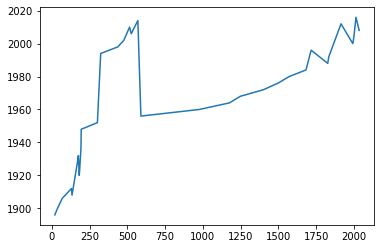

In [28]:
# After that we make a chart to see what's the trend for the number 
# of participants 

ypoints = np.array(event_years)
xpoints = np.array(participants_number)
plt.plot(xpoints, ypoints)
plt.show()

In [29]:
# The trend is increasing.

In [30]:
######################################################################

In [31]:
"""

# What is the relation between age and medals won

"""

'\n\n# What is the relation between age and medals won\n\n'

In [32]:
# Define age column and column that satisfy the condition if have a 
# medal 
age_column = df['Age']
people_with_medals_column = df.loc[medal_filt, "Medal"]

In [33]:
# Firstly we have to convert datatype to categorical and after that use 
# .corr() function

people_with_medals_column = people_with_medals_column.astype('category').cat.codes
age_column = age_column.astype('category').cat.codes
age_column.corr(people_with_medals_column)

-0.002587651700494077

In [34]:
people_with_medals_column.corr(age_column)

-0.002587651700494077

In [35]:
# The relation/correlation is very bad.

In [36]:
########################################################################

In [37]:
"""

# Do tall people win more medals?

# As in the example above as in this case we'll pretend that short is
# <= 160 cm, tall is otherwise. 

"""

"\n\n# Do tall people win more medals?\n\n# As in the example above as in this case we'll pretend that short is\n# <= 160 cm, tall is otherwise. \n\n"

In [38]:
# We define first condition equal to Medal != 'Nan' and height <= 160
# and the second one Medal != 'Nan' and height >= 161
short_with_medal_con = (df['Medal'] != 'Nan') & (df['Height'] <=160.0)
tall_with_medal_con = (df['Medal'] != 'Nan') & (df['Height'] >= 161.0)

In [39]:
#Then we count results for each condition and combine them
count_short_with_medal = df.loc[short_with_medal_con, 'Height']
count_tall_with_medal = df.loc[tall_with_medal_con, 'Height']

In [40]:
count_short_with_medal.count()

1774

In [41]:
count_tall_with_medal.count()

28407

In [42]:
df.loc[medal_filt, 'Medal'].count() # Checking if the results is believable

30181

In [43]:
########################################################################

In [44]:
"""

# Which sports are dominated by short people? (You must define 'short')
     my example short will be < 160 cm

"""

"\n\n# Which sports are dominated by short people? (You must define 'short')\n     my example short will be < 160 cm\n\n"

In [45]:
# Define condition that tells who is short and has a medal

In [46]:
short_and_medal_condition = (df['Height'] <= 160.0) & (df['Medal'] != 'Nan') 

In [47]:
# Created table where we get sports, attended by people who matched 
# our condition

In [48]:
sports_with_short_people = df.loc[short_and_medal_condition, 'Sport']

In [49]:
# Count the results which sport is dominated - 

In [50]:
sports_with_short_people.value_counts()

Gymnastics           492
Weightlifting        162
Wrestling            138
Athletics            121
Diving                89
                    ... 
Rugby Sevens           2
Bobsleigh              1
Skeleton               1
Luge                   1
Modern Pentathlon      1
Name: Sport, Length: 42, dtype: int64

In [51]:
# The sport dominated by short people is Gimnastics.

In [52]:
######################################################################

In [53]:
"""

# Which families (same surname) win the most medals?

"""

'\n\n# Which families (same surname) win the most medals?\n\n'

In [54]:
# First of all we need to divide column 'Name' into two new columns 
# called 'First_name' and 'Surname', then count how many medals are 
# for surname. We assume that only first word is a name.

In [55]:
#Creating 2 seperated columns
df3 = df['Name'].str.split(n=1, expand=True)

In [56]:
# Adding columns
df['First_name'] = df3[0]
df['Surname'] = df3[1]

In [57]:
# Count how many medals fall under each surname
df.loc[medal_filt, 'Surname'].value_counts()

Fred Phelps, II         28
Kovcs                   26
Fischer                 24
Mller                   22
Yang                    22
                        ..
Alexander Tinker         1
Andr Laperrire           1
Yuryevich Bagdasarov     1
Mnchow (-Klose-)         1
Yueming                  1
Name: Surname, Length: 19388, dtype: int64

In [58]:
# Using this method we can't be for 100% sure that is really True, 
# because as like in this case it return only one person. 

for x in list(df['Name']):
    if 'Fred Phelps, II' in x:
        print(x)
        
# Considering this I don't think this will be acknowledge as a family
# because it is only one member, so my answer is: 
# Families with the most medals is Kovcs

Michael Fred Phelps, II
Michael Fred Phelps, II
Michael Fred Phelps, II
Michael Fred Phelps, II
Michael Fred Phelps, II
Michael Fred Phelps, II
Michael Fred Phelps, II
Michael Fred Phelps, II
Michael Fred Phelps, II
Michael Fred Phelps, II
Michael Fred Phelps, II
Michael Fred Phelps, II
Michael Fred Phelps, II
Michael Fred Phelps, II
Michael Fred Phelps, II
Michael Fred Phelps, II
Michael Fred Phelps, II
Michael Fred Phelps, II
Michael Fred Phelps, II
Michael Fred Phelps, II
Michael Fred Phelps, II
Michael Fred Phelps, II
Michael Fred Phelps, II
Michael Fred Phelps, II
Michael Fred Phelps, II
Michael Fred Phelps, II
Michael Fred Phelps, II
Michael Fred Phelps, II


In [59]:
########################################################################

In [61]:
"""
######### SUMMARY #########

Every aims were achieved. We got each answer for each question. Using 
pandas, numpy and matplotlib libraries, because they are very helpful
analysing data sets. Each subtask has its own comments and explanations
to show my way of thinking.

############################

"""

'\n######### SUMMARY #########\n\nEvery aims were achieved. We got each answer for each question. Using \npandas, numpy and matplotlib libraries, because they are very helpful\nanalysing data sets. Each subtask has its own comments and explanations\nto show my way of thinking.\n\n############################\n\n'